In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('FuelConsumption.csv')

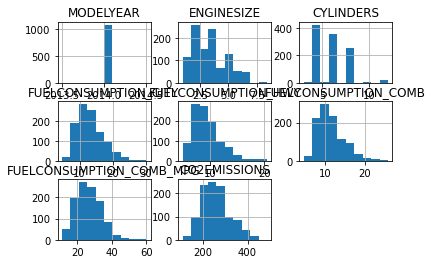

In [4]:
data.hist()
plt.show()

In [5]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


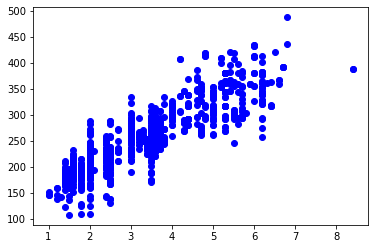

In [7]:
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue')
plt.show()

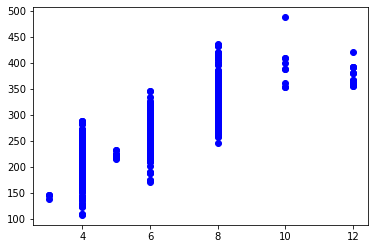

In [8]:
plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], color='blue')
plt.show()

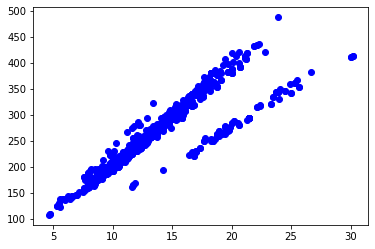

In [9]:
plt.scatter(data['FUELCONSUMPTION_CITY'], data['CO2EMISSIONS'], color='blue')
plt.show()

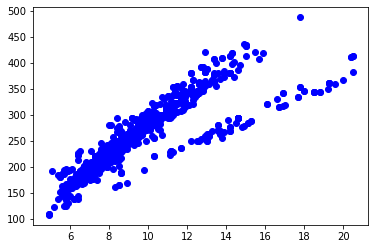

In [10]:
plt.scatter(data['FUELCONSUMPTION_HWY'], data['CO2EMISSIONS'], color='blue')
plt.show()

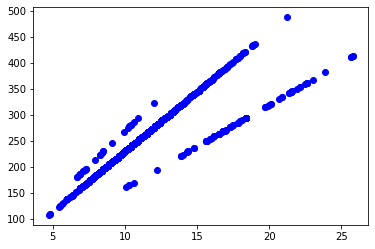

In [11]:
plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'], color='blue')
plt.show()

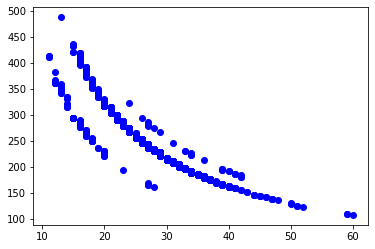

In [12]:
plt.scatter(data['FUELCONSUMPTION_COMB_MPG'], data['CO2EMISSIONS'], color='blue')
plt.show()

In [13]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
print(len(train))
print(len(test))

843
224


In [14]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
train_x = train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
train_y = train[['CO2EMISSIONS']]
reg.fit(train_x, train_y)
print(reg.coef_)
print(reg.intercept_)

[[10.46881977  6.54499723  8.50931364]]
[70.34513352]


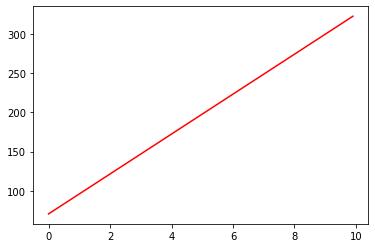

In [16]:
x = np.arange(0, 10, 0.1)
y = reg.coef_[0][0] * x + reg.coef_[0][1] * x + reg.coef_[0][2] * x + reg.intercept_[0]
plt.plot(x, y, color='red')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
test_y = test[['CO2EMISSIONS']]
test_y_ = reg.predict(test_x)
score = r2_score(test_y, test_y_)
print(score)